In [43]:
import tensorflow as tf
from tensorflow.keras import models, layers
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from keras.constraints import maxnorm
import matplotlib.image as mpimg

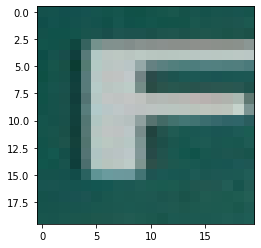

In [44]:
plt.imshow(imread("./trainResized/" + str(tf.random.uniform(shape=(), minval=1, maxval=6270, dtype=tf.int32).numpy())+".Bmp"))

<AxesSubplot:>

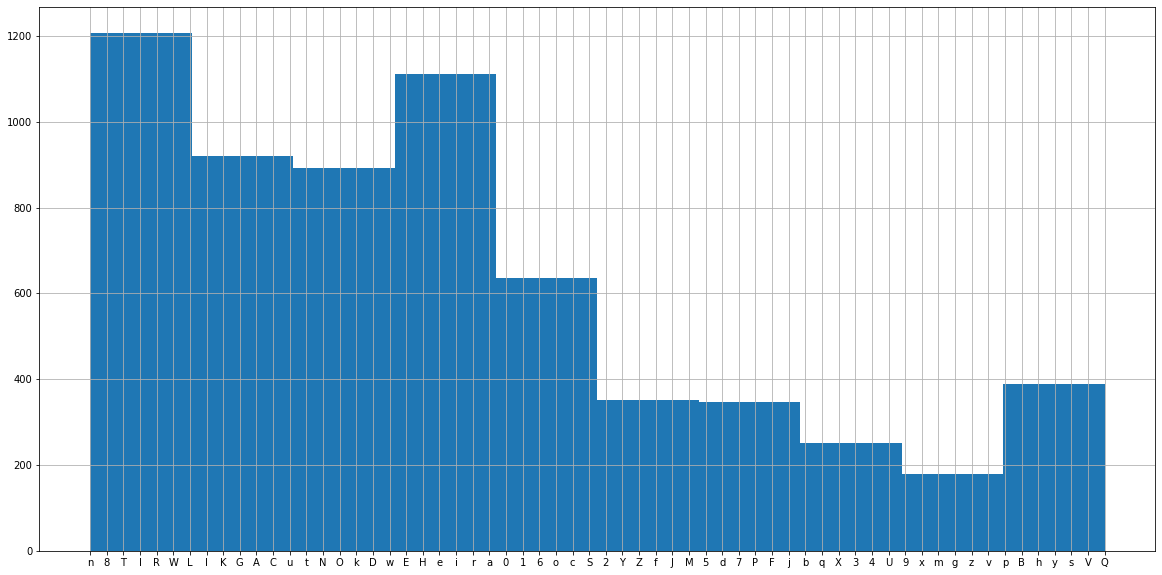

In [45]:
#Get number of images for each class
train_labels = pd.read_csv("./trainLabels.csv")
train_labels["Class"].hist(figsize=(20,10))

In [46]:
IMG_LENGTH = 20
IMG_WIDTH  = 20

In [47]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
train_labels['code'] = LE.fit_transform(train_labels['Class'])




In [48]:
X = []
excluded_images = []
for img in os.listdir("./trainResized/"):
    loaded_img = mpimg.imread(os.path.join("./trainResized/", img))
    if loaded_img.shape == (20, 20, 3):
        X.append(loaded_img)
    else:
        row_to_exclude = int(img.split(".")[0])
        excluded_images.append(row_to_exclude)
        index = train_labels[(train_labels.ID== row_to_exclude)].index
        train_labels = train_labels.drop(index)

In [49]:
y = list(train_labels['code'])

In [50]:
X = np.array(X)
X = X/255.
y = np.array(y)


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=42, shuffle = True)

In [52]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5024, 20, 20, 3), (5024,), (1256, 20, 20, 3), (1256,))

In [53]:
#X_train = X_train.reshape(X_train.shape[0], IMG_LENGTH, IMG_WIDTH, 1)
#X_test = X_test.reshape(X_test.shape[0], IMG_LENGTH, IMG_WIDTH, 1)

In [54]:
learning_rate = 0.001
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(IMG_LENGTH, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides= (2,2), padding= 'valid'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides= (2,2), padding= 'valid'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())


model.add(layers.Flatten())

model.add(layers.Dense(100))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Dense(62))
model.add(layers.Activation('softmax'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

C:\Users\youss\PycharmProjects\venv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [55]:
batch_size = 32
epochs = 400

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, shuffle=True,validation_data=(X_test,y_test))
pd.DataFrame(history.history).plot()

Epoch 1/400
157/157 [==============================] - 4s 22ms/step - loss: 4.3991 - accuracy: 0.0273 - val_loss: 4.0625 - val_accuracy: 0.0446

KeyboardInterrupt: 